In [80]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from pandas.api.types import CategoricalDtype
from functools import reduce

%matplotlib inline

In [81]:
# Load the dataset for Covid-19 mortality data with specific fields
fields_mortality = ['iso_code', 'continent', 'location', 'date', 'total_cases', 
                    'new_cases', 'total_deaths', 'new_deaths', 
                    'total_cases_per_million', 'new_cases_per_million',
                    'total_deaths_per_million','new_deaths_per_million', 'icu_patients',
                    'new_tests','total_tests', 'total_tests_per_thousand',
                    'new_tests_per_thousand', 'stringency_index', 'population', 
                    'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
                    'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
                    'handwashing_facilities', 'hospital_beds_per_thousand','life_expectancy',
                    'human_development_index']
df = pd.read_csv("Data/owid-covid-data.csv", usecols=fields_mortality)
df




,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.122,0.122,...,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,41128772.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.122,0.000,...,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,41128772.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.122,0.000,...,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,41128772.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.122,0.000,...,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,41128772.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.122,0.000,...,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,41128772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256054,ZWE,Africa,Zimbabwe,2023-02-04,262324.0,0.0,5658.0,0.0,16073.244,0.000,...,2.822,1.882,1899.775,307.846,1.82,36.791,1.7,61.49,0.571,16320539.0
256055,ZWE,Africa,Zimbabwe,2023-02-05,262324.0,0.0,5658.0,0.0,16073.244,0.000,...,2.822,1.882,1899.775,307.846,1.82,36.791,1.7,61.49,0.571,16320539.0
256056,ZWE,Africa,Zimbabwe,2023-02-06,262324.0,0.0,5658.0,0.0,16073.244,0.000,...,2.822,1.882,1899.775,307.846,1.82,36.791,1.7,61.49,0.571,16320539.0
256057,ZWE,Africa,Zimbabwe,2023-02-07,262324.0,0.0,5658.0,0.0,16073.244,0.000,...,2.822,1.882,1899.775,307.846,1.82,36.791,1.7,61.49,0.571,16320539.0


In [82]:
# Prior to performing the merge, we will rename some of the columns in the first dataframe
# and capitalize all columns.

# Rename the 'iso_code', 'continent', 'location' fields in the existing dataframe
df.rename(columns={'iso_code': 'ISO', 'continent': 'REGION', 'location': 'COUNTRY'}, 
          inplace=True)

In [83]:
# Capitalize the header of the dataframe
df.columns = df.columns.str.upper()


In [84]:
# Convert the 'Date' field from object to datetime
df['DATE'] = pd.to_datetime(df['DATE'])
print(type(df['DATE']))
df.head()
# TIP: If converting multiple object fields to datetime, use this
# df[["col1", "col2", "col3"]] = df[["col1", "col2", "col3"]].apply(pd.to_datetime)

<class 'pandas.core.series.Series'>


,ISO,REGION,COUNTRY,DATE,TOTAL_CASES,NEW_CASES,TOTAL_DEATHS,NEW_DEATHS,TOTAL_CASES_PER_MILLION,NEW_CASES_PER_MILLION,...,AGED_65_OLDER,AGED_70_OLDER,GDP_PER_CAPITA,CARDIOVASC_DEATH_RATE,DIABETES_PREVALENCE,HANDWASHING_FACILITIES,HOSPITAL_BEDS_PER_THOUSAND,LIFE_EXPECTANCY,HUMAN_DEVELOPMENT_INDEX,POPULATION
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.122,0.122,...,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,41128772.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.122,0.000,...,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,41128772.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.122,0.000,...,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,41128772.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.122,0.000,...,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,41128772.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.122,0.000,...,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,41128772.0


In [85]:
# Print shape of the first dataframe
print(df.shape)

(256059, 30)


In [86]:
# Load the dataset for the Covid-19 prevention measures taken by country and date with specific fields from Sheet 2

fields_measures = ['ISO','DATE_IMPLEMENTED','CATEGORY','MEASURE']

df2 = pd.read_excel("Data/acaps_covid19_government_measures_dataset_0.xlsx",usecols=fields_measures,sheet_name="Dataset")

# Rename the 'DATE_IMPLEMENTED' field
df2.rename(columns={'DATE_IMPLEMENTED': 'DATE'}, inplace=True)

print("Dataframe details: {}".format(df2.shape))
df2.info()

Dataframe details: (23923, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23923 entries, 0 to 23922
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ISO       23923 non-null  object        
 1   CATEGORY  23923 non-null  object        
 2   MEASURE   23923 non-null  object        
 3   DATE      23630 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 747.7+ KB


In [87]:
# Merge dataframes using ISO and DATE fields as the matching 'keys' and save as dataframe 'df'
frames = [df, df2]
df3 = reduce(lambda left, right: pd.merge(left, right, on=['ISO', 'DATE'], how='outer'), frames)

# Save output for reference
df3.to_csv("output.csv")

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270176 entries, 0 to 270175
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ISO                         270176 non-null  object        
 1   REGION                      253968 non-null  object        
 2   COUNTRY                     268344 non-null  object        
 3   DATE                        269883 non-null  datetime64[ns]
 4   TOTAL_CASES                 253884 non-null  float64       
 5   NEW_CASES                   253595 non-null  float64       
 6   TOTAL_DEATHS                232275 non-null  float64       
 7   NEW_DEATHS                  232170 non-null  float64       
 8   TOTAL_CASES_PER_MILLION     252786 non-null  float64       
 9   NEW_CASES_PER_MILLION       252497 non-null  float64       
 10  TOTAL_DEATHS_PER_MILLION    231190 non-null  float64       
 11  NEW_DEATHS_PER_MILLION      231085 non-

In [88]:
# Filter the Merged dataframe to only include 'select' countries of interest
# Overwrite and save back as dataframe df
country_list = ['AUS', 'USA','CAD' 'IND', 'CHN', 'SWE','GBR','KOR', 'TWN','ITA','PRT']
# Drop all rows that has 'at least' 20 NaN values
df = df3[df3['ISO'].isin(country_list)].dropna(thresh=20)

# Save output for reference
df.to_csv("output2.csv")

df3.head()

,ISO,REGION,COUNTRY,DATE,TOTAL_CASES,NEW_CASES,TOTAL_DEATHS,NEW_DEATHS,TOTAL_CASES_PER_MILLION,NEW_CASES_PER_MILLION,...,GDP_PER_CAPITA,CARDIOVASC_DEATH_RATE,DIABETES_PREVALENCE,HANDWASHING_FACILITIES,HOSPITAL_BEDS_PER_THOUSAND,LIFE_EXPECTANCY,HUMAN_DEVELOPMENT_INDEX,POPULATION,CATEGORY,MEASURE
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.122,0.122,...,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,41128772.0,Movement restrictions,Border closure
1,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.122,0.122,...,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,41128772.0,Public health measures,General recommendations
2,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.122,0.122,...,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,41128772.0,Governance and socio-economic measures,State of emergency declared
3,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.122,0.122,...,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,41128772.0,Public health measures,Awareness campaigns
4,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.122,0.122,...,1803.987,597.029,9.59,37.746,0.5,64.83,0.511,41128772.0,Movement restrictions,Domestic travel restrictions


In [89]:
# Print shape of the merged dataframe
print(df.shape)

(11363, 32)


In [90]:
# Print overview of data
print("Data types: {}".format(df.info()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11363 entries, 13455 to 253877
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ISO                         11363 non-null  object        
 1   REGION                      11363 non-null  object        
 2   COUNTRY                     11363 non-null  object        
 3   DATE                        11363 non-null  datetime64[ns]
 4   TOTAL_CASES                 11362 non-null  float64       
 5   NEW_CASES                   11342 non-null  float64       
 6   TOTAL_DEATHS                11173 non-null  float64       
 7   NEW_DEATHS                  11146 non-null  float64       
 8   TOTAL_CASES_PER_MILLION     11362 non-null  float64       
 9   NEW_CASES_PER_MILLION       11342 non-null  float64       
 10  TOTAL_DEATHS_PER_MILLION    11173 non-null  float64       
 11  NEW_DEATHS_PER_MILLION      11146 non-null  float

In [91]:
# Show part of the dataframe
df.head(10)

,ISO,REGION,COUNTRY,DATE,TOTAL_CASES,NEW_CASES,TOTAL_DEATHS,NEW_DEATHS,TOTAL_CASES_PER_MILLION,NEW_CASES_PER_MILLION,...,GDP_PER_CAPITA,CARDIOVASC_DEATH_RATE,DIABETES_PREVALENCE,HANDWASHING_FACILITIES,HOSPITAL_BEDS_PER_THOUSAND,LIFE_EXPECTANCY,HUMAN_DEVELOPMENT_INDEX,POPULATION,CATEGORY,MEASURE
13455,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,0.153,0.153,...,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN
13456,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,0.191,0.038,...,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN
13457,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,0.191,0.000,...,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN
13458,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,0.229,0.038,...,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN
13459,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,0.344,0.115,...,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN
13460,AUS,Oceania,Australia,2020-01-31,9.0,0.0,NaN,NaN,0.344,0.000,...,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN
13461,AUS,Oceania,Australia,2020-02-01,12.0,3.0,NaN,NaN,0.458,0.115,...,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN
13462,AUS,Oceania,Australia,2020-02-02,12.0,0.0,NaN,NaN,0.458,0.000,...,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN
13463,AUS,Oceania,Australia,2020-02-03,12.0,0.0,NaN,NaN,0.458,0.000,...,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN
13464,AUS,Oceania,Australia,2020-02-04,13.0,1.0,NaN,NaN,0.497,0.038,...,44648.71,107.791,5.07,NaN,3.84,83.44,0.944,26177410.0,NaN,NaN


In [92]:
# Convert ISO, REGION, COUNTRY, CATEGORY and MEASURE to Categorical data types
# The below code returns all columns of type 'Object'
categorical_series = df.select_dtypes(['object']).columns

for item in categorical_series:
    df[item] = df[item].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11363 entries, 13455 to 253877
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ISO                         11363 non-null  category      
 1   REGION                      11363 non-null  category      
 2   COUNTRY                     11363 non-null  category      
 3   DATE                        11363 non-null  datetime64[ns]
 4   TOTAL_CASES                 11362 non-null  float64       
 5   NEW_CASES                   11342 non-null  float64       
 6   TOTAL_DEATHS                11173 non-null  float64       
 7   NEW_DEATHS                  11146 non-null  float64       
 8   TOTAL_CASES_PER_MILLION     11362 non-null  float64       
 9   NEW_CASES_PER_MILLION       11342 non-null  float64       
 10  TOTAL_DEATHS_PER_MILLION    11173 non-null  float64       
 11  NEW_DEATHS_PER_MILLION      11146 non-null  float

In [93]:
# Descriptive statistics for numeric variables
print(df.describe())

        TOTAL_CASES     NEW_CASES  TOTAL_DEATHS    NEW_DEATHS  \
count  1.136200e+04  1.134200e+04  1.117300e+04  11146.000000   
mean   7.705808e+06  1.991394e+04  9.563202e+04    194.559483   
std    1.797000e+07  5.575563e+04  2.160250e+05    750.435634   
min    1.000000e+00  0.000000e+00  1.000000e+00      0.000000   
25%    3.973700e+04  2.900000e+01  1.576000e+03      0.000000   
50%    5.596680e+05  9.455000e+02  1.465100e+04     13.000000   
75%    5.273845e+06  1.710575e+04  7.082600e+04    106.000000   
max    1.027377e+08  1.354502e+06  1.113236e+06  59895.000000   

       TOTAL_CASES_PER_MILLION  NEW_CASES_PER_MILLION  \
count             11362.000000           11342.000000   
mean              96857.240929             280.333174   
std              145714.148500             718.893518   
min                   0.003000               0.000000   
25%                 672.230000               0.306000   
50%                7315.815500              26.868500   
75%            

In [94]:
#Univariate Exploration - Numerical Variables
# Set Plot Style to emulate 'ggplot', a popular plotting package for R
plt.style.use('ggplot')
color = sb.color_palette()[0]

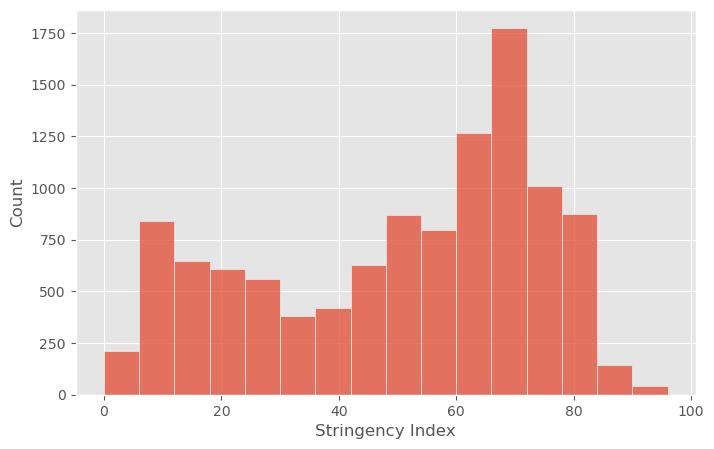

In [95]:
# Let's start off with the Stringency Index, here we are interested that in general, how strict was the world's
# response to the pandemic?

binsize = 6
bins = np.arange(0, df['STRINGENCY_INDEX'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
sb.histplot(data = df, x = 'STRINGENCY_INDEX', bins = bins, color=color)
plt.xlabel('Stringency Index')
plt.show()

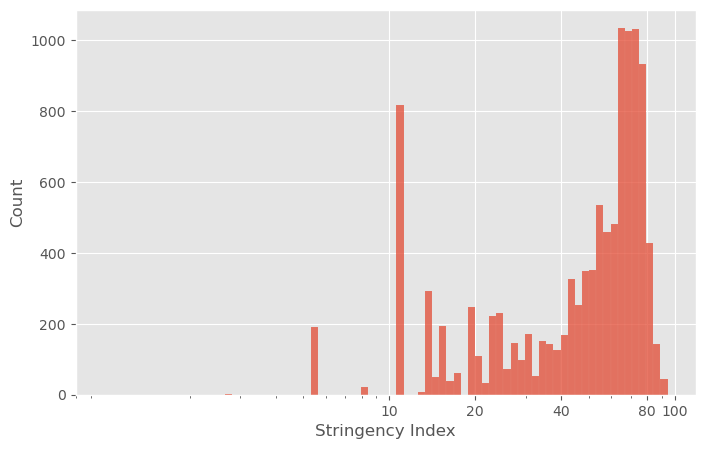

In [96]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['STRINGENCY_INDEX'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
sb.histplot(data = df, x = 'STRINGENCY_INDEX', bins = bins, color = color)
plt.xscale('log')
plt.xticks([10, 20, 40, 80, 100], ['10','20','40','80','100'])
plt.xlabel('Stringency Index')
plt.show()

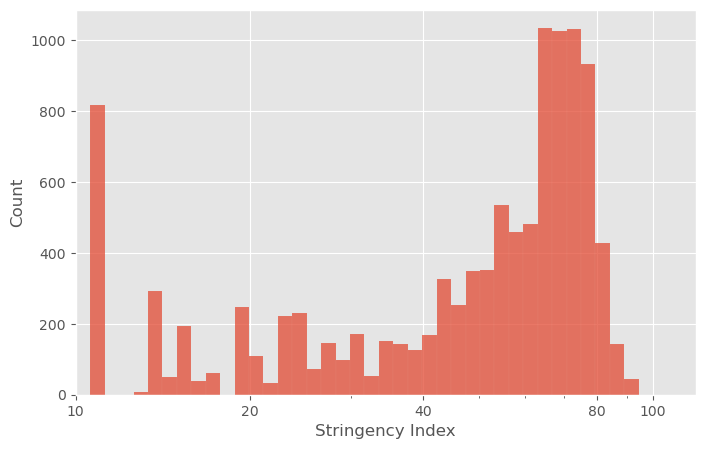

In [97]:
# Set xlimit to be 10 so that we can zoom in on the data
plt.figure(figsize=[8, 5])
sb.histplot(data = df, x = 'STRINGENCY_INDEX', bins = bins, color = color)
plt.xscale('log')
plt.xticks([10, 20, 40, 80, 100], ['10','20','40','80','100'])
plt.xlabel('Stringency Index')
plt.xlim(10)
plt.show()

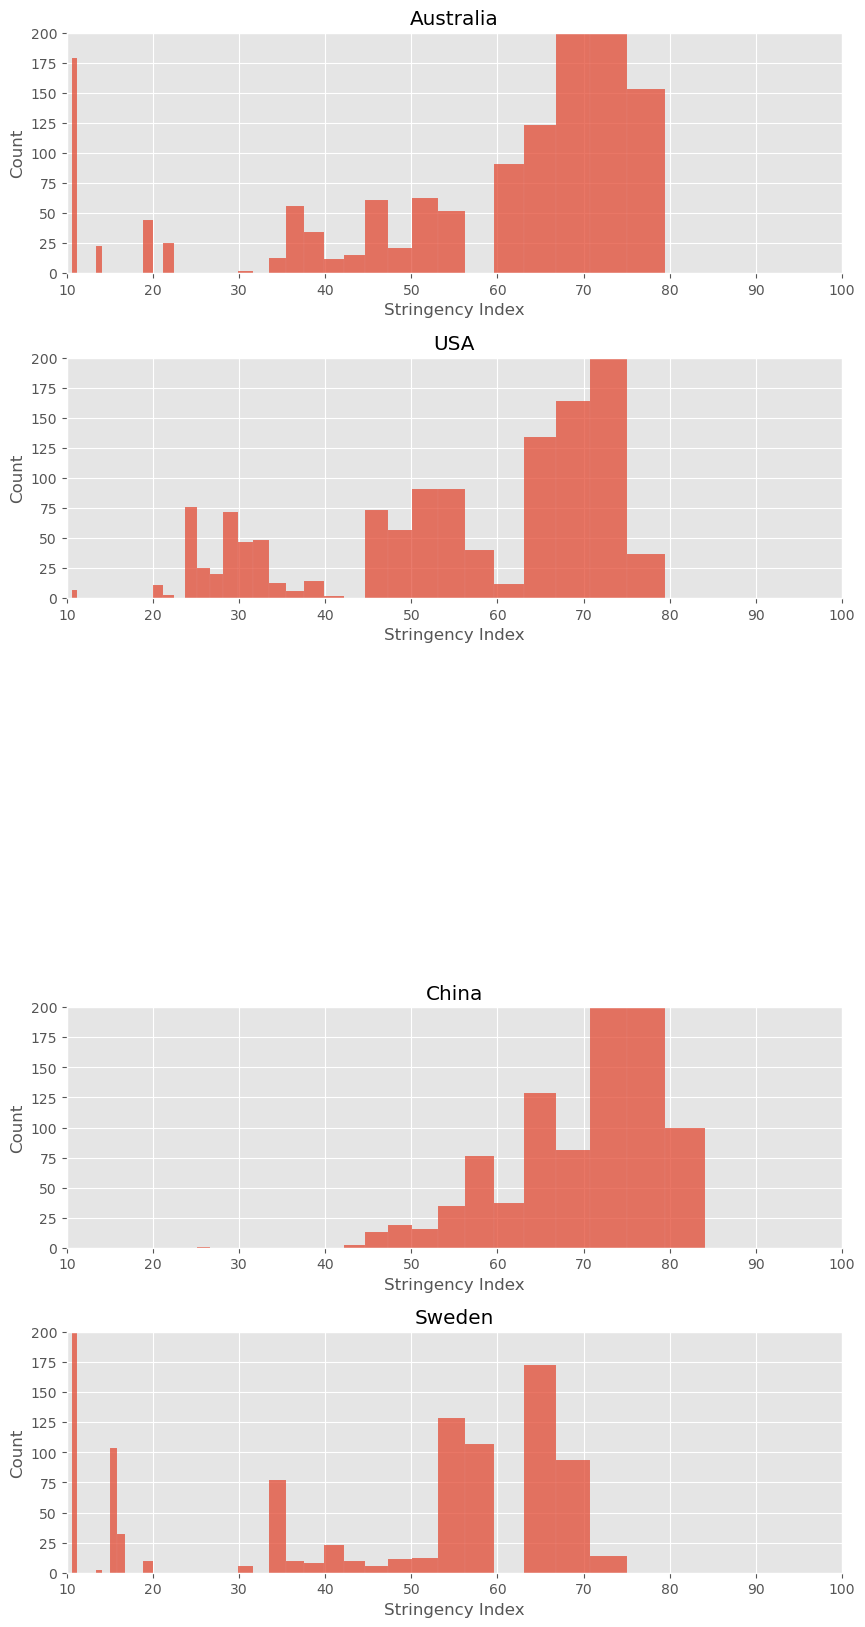

In [98]:
# Create country filters
australia_df = df[df['ISO'] == 'AUS']
usa_df = df[df['ISO'] == 'USA']
#india_df = df[df['ISO'] == 'IND']
china_df = df[df['ISO'] == 'CHN']
sweden_df = df[df['ISO'] == 'SWE']

plt.figure(figsize = [10,20])
# Space apart the plots so they don't overlap each other
plt.subplots_adjust(hspace = 0.35)

plt.subplot(5,1,1)
sb.histplot(data = australia_df, x = 'STRINGENCY_INDEX', bins = bins, color = color)
plt.xlabel('Stringency Index')
plt.title("Australia")
plt.xlim(10,100)
plt.ylim(0,200)

plt.subplot(5,1,2)
sb.histplot(data = usa_df, x = 'STRINGENCY_INDEX', bins = bins, color = color)
plt.xlabel('Stringency Index')
plt.title("USA")
plt.xlim(10,100)
plt.ylim(0,200)

plt.subplot(5,1,4)
sb.histplot(data = china_df, x = 'STRINGENCY_INDEX', bins = bins, color = color)
plt.xlabel('Stringency Index')
plt.title("China")
plt.xlim(10,100)
plt.ylim(0,200)

plt.subplot(5,1,5)
sb.histplot(data = sweden_df, x = 'STRINGENCY_INDEX', bins = bins, color = color)
plt.xlabel('Stringency Index')
plt.title("Sweden")
plt.xlim(10,100)
plt.ylim(0,200);

# Save output for reference
#sweden_df.to_csv("output.csv")
country_list = ['AUS', 'USA', 'IND', 'CHN', 'SWE','GBR','KOR', 'TWN','ITA','PRT']#sweden_df.head()

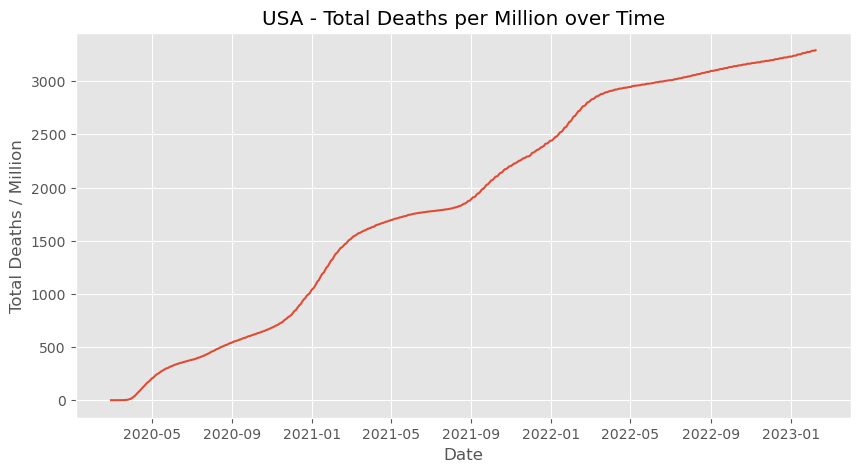

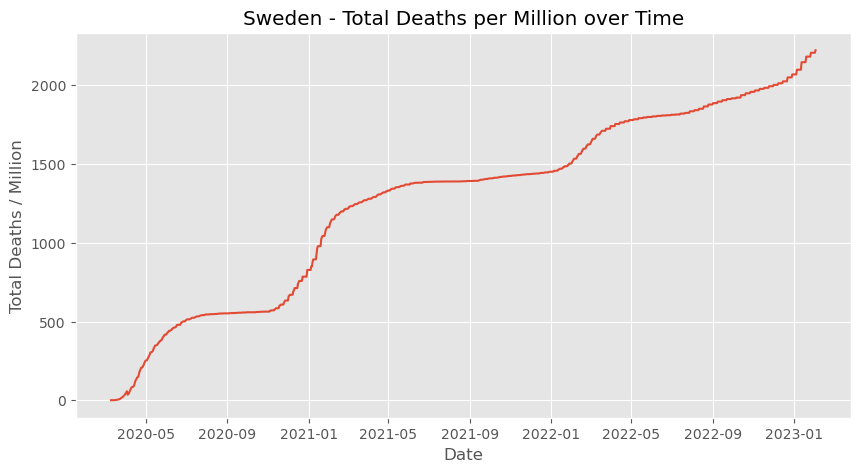

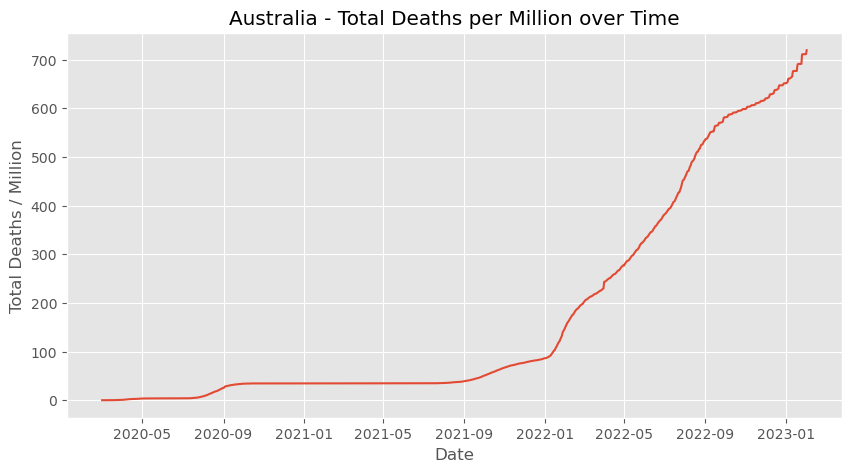

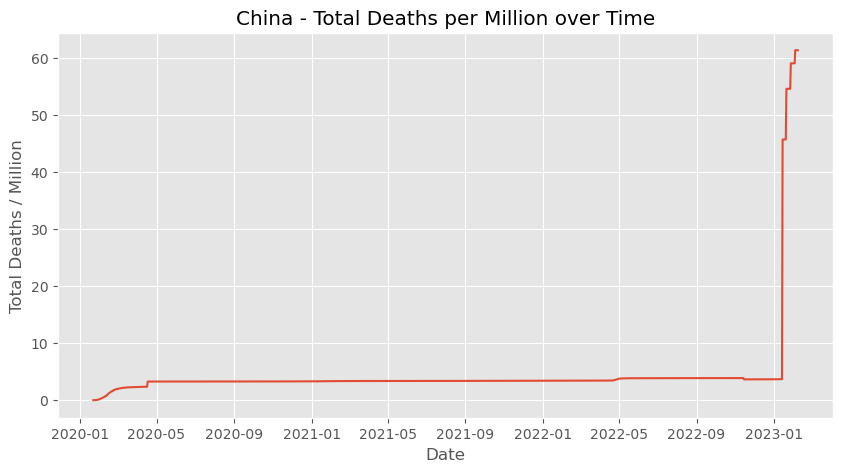

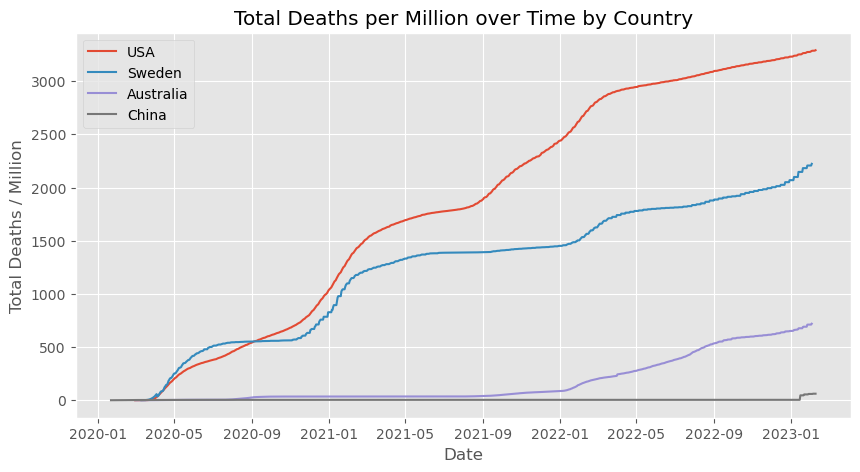

In [102]:
#Bivariate Exploration
# Let's model the total deaths per million against each country

# USA
plt.figure(figsize=(10,5))
plt.errorbar(data = usa_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.title("USA - Total Deaths per Million over Time")
plt.show()

# Sweden
plt.figure(figsize=(10,5))
plt.errorbar(data = sweden_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.title("Sweden - Total Deaths per Million over Time")
plt.show()


# Australia
plt.figure(figsize=(10,5))
plt.errorbar(data = australia_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.title("Australia - Total Deaths per Million over Time")
plt.show()

# China
plt.figure(figsize=(10,5))
plt.errorbar(data = china_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.title("China - Total Deaths per Million over Time")
plt.show()

# Combined
legend_label = ['USA', 'Sweden', 'Australia', 'China']
plt.figure(figsize=(10,5))
plt.errorbar(data = usa_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.errorbar(data = sweden_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
#plt.errorbar(data = india_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.errorbar(data = australia_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.errorbar(data = china_df, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION')
plt.xlabel("Date")
plt.ylabel("Total Deaths / Million")
plt.title("Total Deaths per Million over Time by Country")
plt.legend(labels = legend_label)
plt.show()

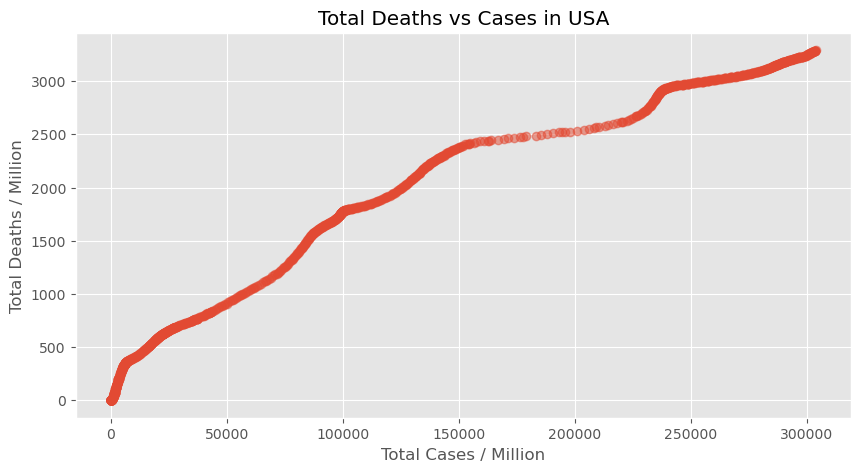

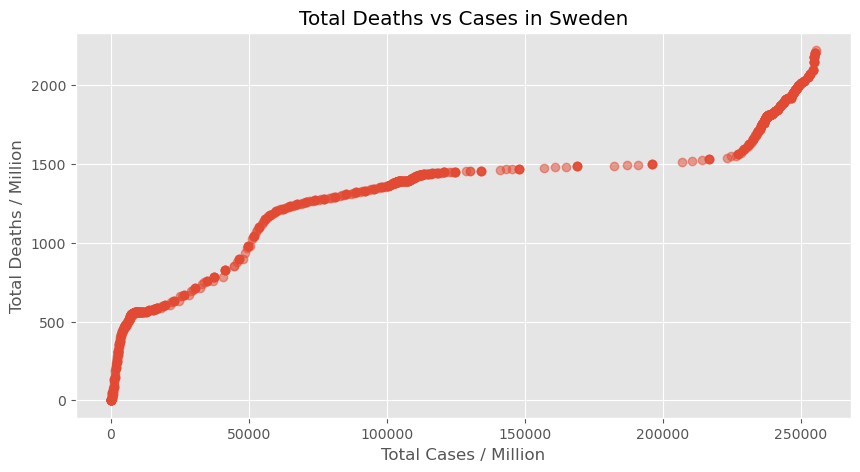

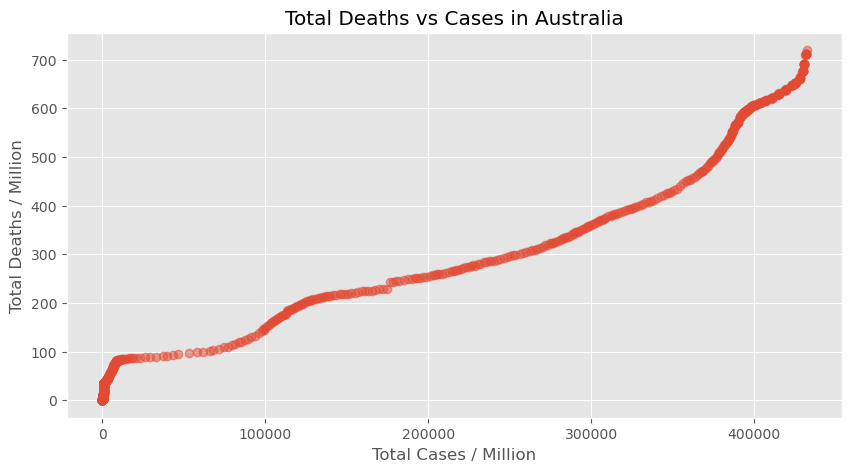

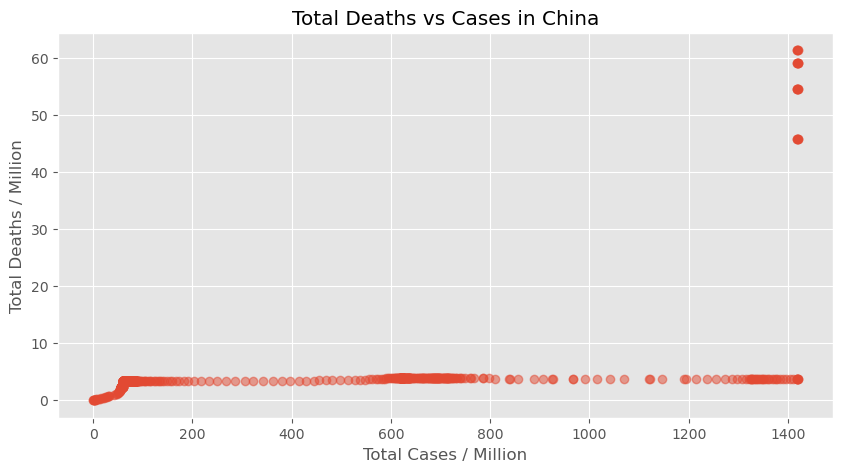

In [103]:
# Scatter plot showing positive correlations
plt.figure(figsize=(10,5))
sb.regplot(data = usa_df, x = 'TOTAL_CASES_PER_MILLION', 
           y='TOTAL_DEATHS_PER_MILLION', truncate = False, x_jitter=0.5, 
           scatter_kws={'alpha':0.5}, fit_reg=False)
plt.xlabel("Total Cases / Million")
plt.ylabel("Total Deaths / Million")
plt.title("Total Deaths vs Cases in USA");

plt.figure(figsize=(10,5))
sb.regplot(data = sweden_df, x = 'TOTAL_CASES_PER_MILLION', 
           y='TOTAL_DEATHS_PER_MILLION', truncate = False, x_jitter=0.5, 
           scatter_kws={'alpha':0.5}, fit_reg=False)
plt.xlabel("Total Cases / Million")
plt.ylabel("Total Deaths / Million")
plt.title("Total Deaths vs Cases in Sweden");

plt.figure(figsize=(10,5))
sb.regplot(data = australia_df, x = 'TOTAL_CASES_PER_MILLION', 
           y='TOTAL_DEATHS_PER_MILLION', truncate = False, x_jitter=0.5, 
           scatter_kws={'alpha':0.5}, fit_reg=False)
plt.xlabel("Total Cases / Million")
plt.ylabel("Total Deaths / Million")
plt.title("Total Deaths vs Cases in Australia");

plt.figure(figsize=(10,5))
sb.regplot(data = china_df, x = 'TOTAL_CASES_PER_MILLION', 
           y='TOTAL_DEATHS_PER_MILLION', truncate = False, x_jitter=0.5, 
           scatter_kws={'alpha':0.5}, fit_reg=False)
plt.xlabel("Total Cases / Million")
plt.ylabel("Total Deaths / Million")
plt.title("Total Deaths vs Cases in China");

In [60]:
#Multivariate Exploration
numeric_vars = ['STRINGENCY_INDEX','POPULATION','POPULATION_DENSITY','MEDIAN_AGE'
                ,'GDP_PER_CAPITA','CARDIOVASC_DEATH_RATE', 'HUMAN_DEVELOPMENT_INDEX',
                'DIABETES_PREVALENCE']
                  
country_list = ['USA', 'SWE' 'IND', 'AUS' 'CHN']
countries_df = df[df['ISO'].isin(country_list)]

# Print for debug
countries_df.to_csv("test.csv")

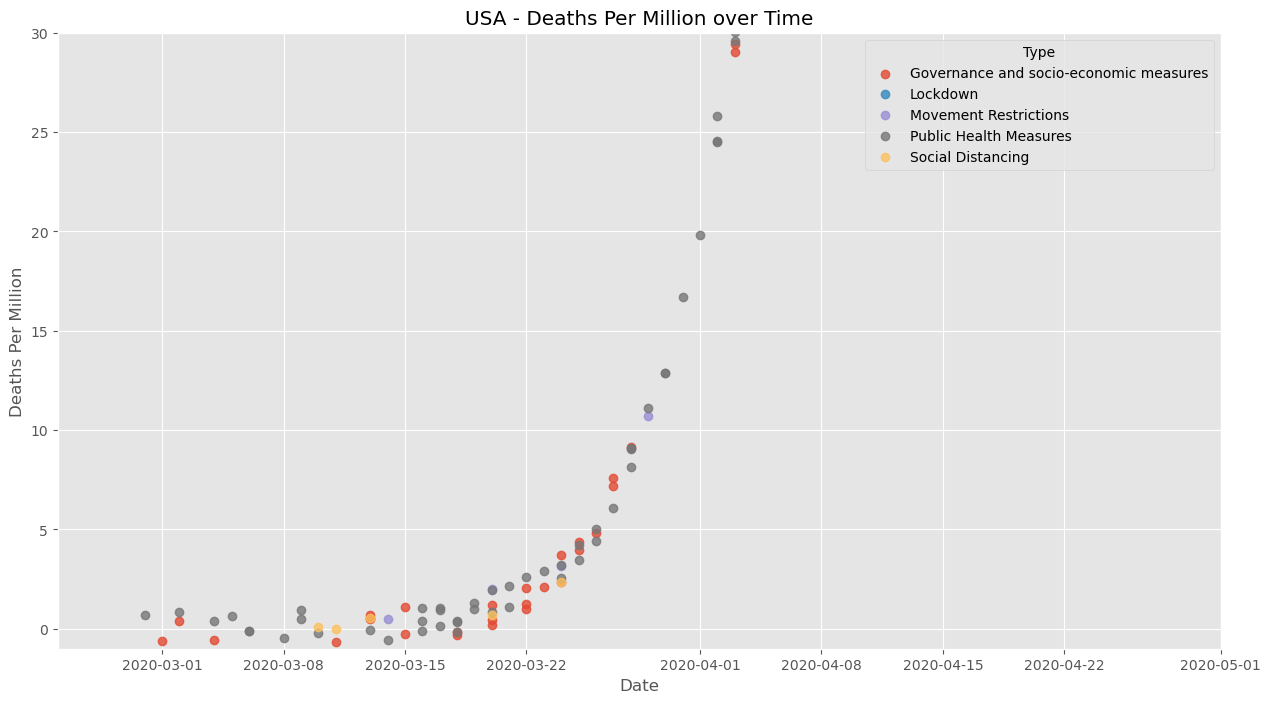

In [61]:
# NOTICED THAT THERE ARE MULTIPLE DAYS WITH THE SAME JITTER AND ROW DATA IN THE DATASET
measure_markers = [['Governance and socio-economic measures', 'o'], ['Lockdown', '^'],
                  ['Movement restrictions', 's'], ['Public health measures', 's'], ['Social distancing', 'o']]
plt.figure(figsize=(15,8))
for measure, marker in measure_markers:
    df_cat = usa_df[usa_df['CATEGORY'] == measure].drop_duplicates()
    sb.regplot(data = df_cat, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.9)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date")
plt.title("USA - Deaths Per Million over Time")
# Set view limits on the x,y axis
plt.ylim(-1, 30)
plt.xlim(dt.date(2020, 2, 24), dt.date(2020, 5, 1));

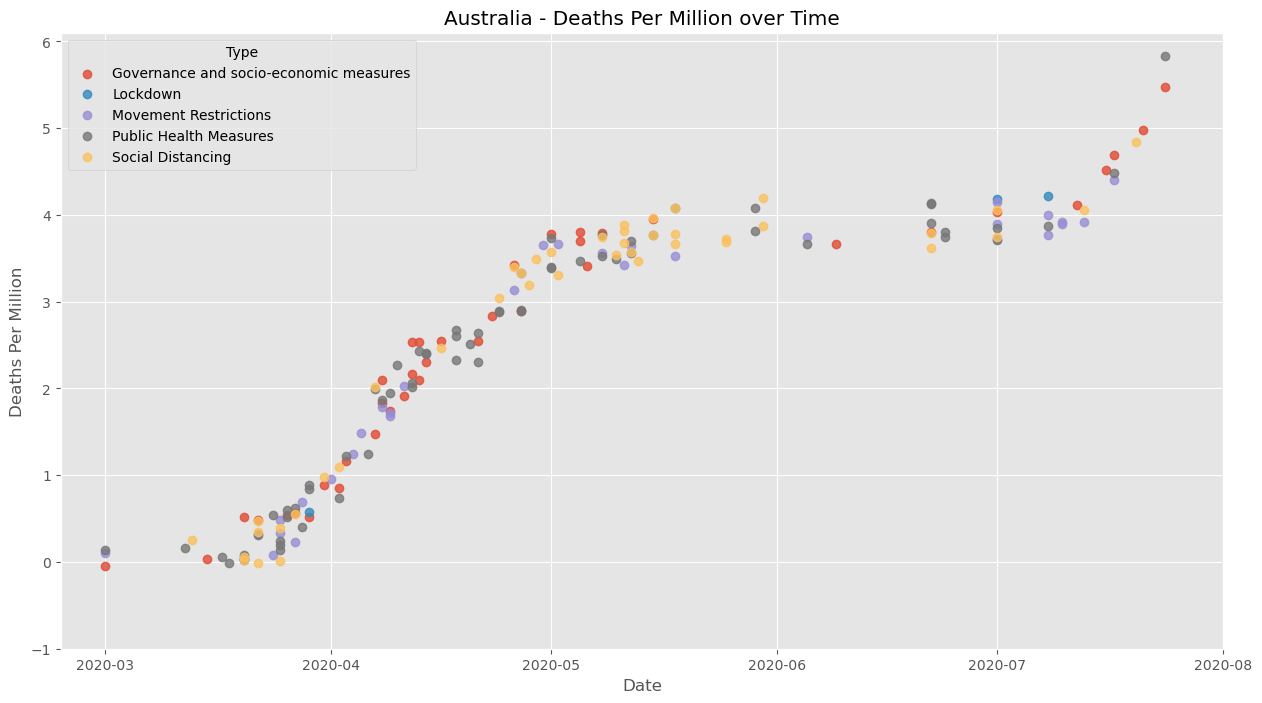

In [50]:
# NOTICED THAT THERE ARE MULTIPLE DAYS WITH THE SAME JITTER AND ROW DATA IN THE DATASET
measure_markers = [['Governance and socio-economic measures', 'o'], ['Lockdown', '^'],
                  ['Movement restrictions', 's'], ['Public health measures', 's'], ['Social distancing', 'o']]
plt.figure(figsize=(15,8))
for measure, marker in measure_markers:
    df_cat = australia_df[australia_df['CATEGORY'] == measure].drop_duplicates()
    sb.regplot(data = df_cat, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.3)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date");
plt.title("Australia - Deaths Per Million over Time")
# Set view limits on the x,y axis
plt.ylim(-1, 6.1)
plt.xlim(dt.date(2020, 2, 24), dt.date(2020, 8, 1));

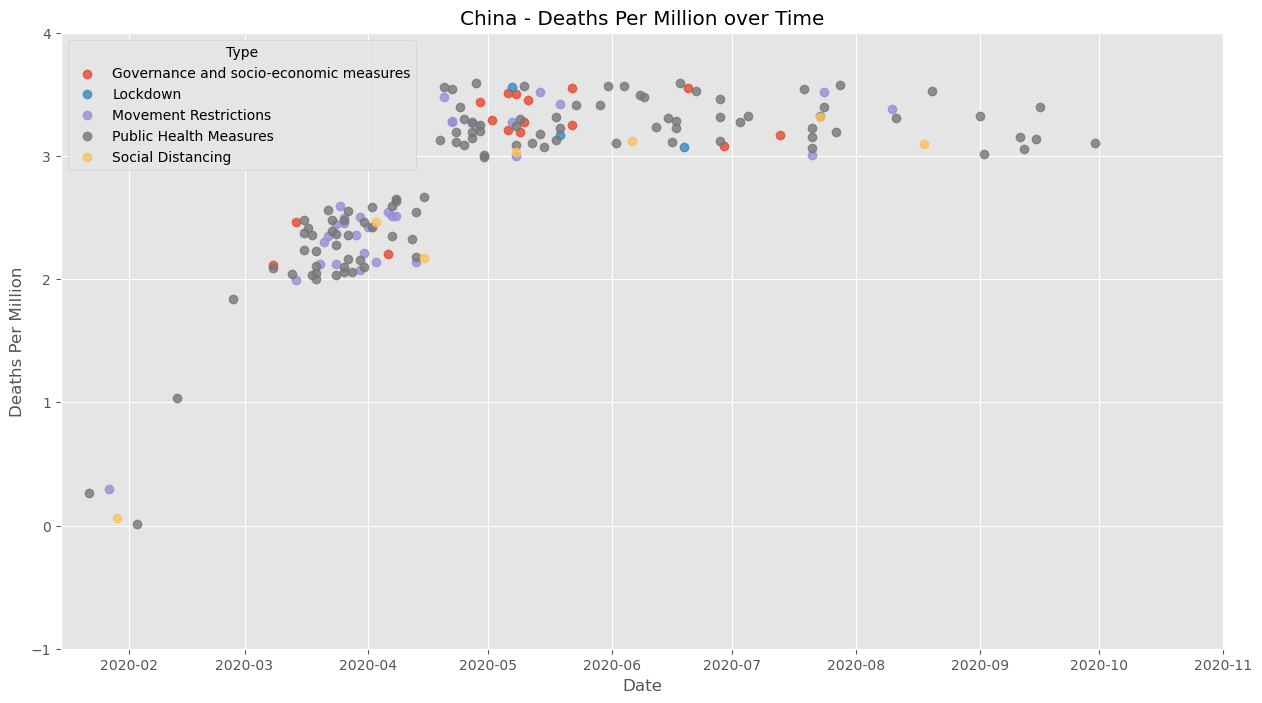

In [51]:
# NOTICED THAT THERE ARE MULTIPLE DAYS WITH THE SAME JITTER AND ROW DATA IN THE DATASET
measure_markers = [['Governance and socio-economic measures', 'o'], ['Lockdown', '^'],
                  ['Movement restrictions', 's'], ['Public health measures', 's'], ['Social distancing', 'o']]
plt.figure(figsize=(15,8))
for measure, marker in measure_markers:
    df_cat = china_df[china_df['CATEGORY'] == measure].drop_duplicates()
    sb.regplot(data = df_cat, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.3)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date");
plt.title("China - Deaths Per Million over Time")
# Set view limits on the x,y axis
plt.ylim(-1, 4)
plt.xlim(dt.date(2020, 1, 15), dt.date(2020, 11, 1));

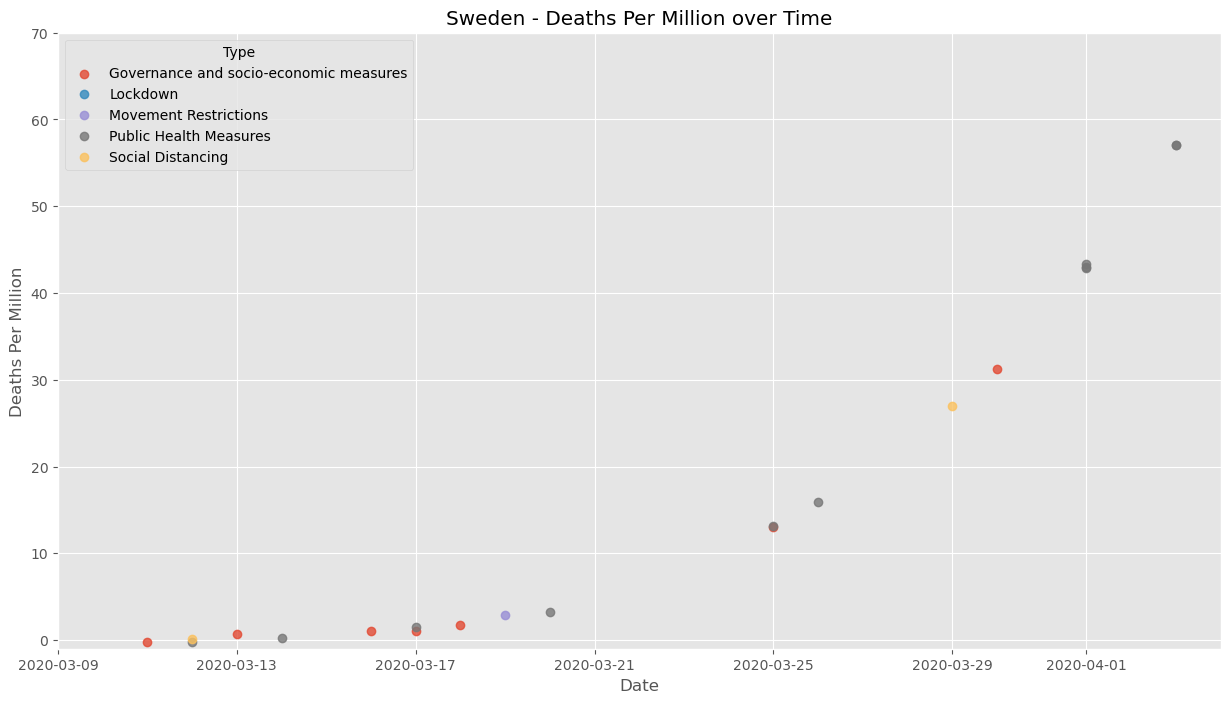

In [54]:
# NOTICED THAT THERE ARE MULTIPLE DAYS WITH THE SAME JITTER AND ROW DATA IN THE DATASET
measure_markers = [['Governance and socio-economic measures', 'o'], ['Lockdown', '^'],
                  ['Movement restrictions', 's'], ['Public health measures', 's'], ['Social distancing', 'o']]
plt.figure(figsize=(15,8))
for measure, marker in measure_markers:
    df_cat = sweden_df[sweden_df['CATEGORY'] == measure].drop_duplicates()
    sb.regplot(data = df_cat, x = 'DATE', y = 'TOTAL_DEATHS_PER_MILLION', fit_reg=False, y_jitter=0.5)

plt.legend(['Governance and socio-economic measures', 'Lockdown', 'Movement Restrictions', 
            'Public Health Measures', 'Social Distancing'], title = 'Type')
plt.ylabel("Deaths Per Million")
plt.xlabel("Date");
plt.title("Sweden - Deaths Per Million over Time")
# Set view limits on the x,y axis
plt.ylim(-1, 70)
plt.xlim(dt.date(2020, 3, 9), dt.date(2020, 4, 4));